In [1]:
import sys, os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn')

%config InlineBackend.figure_format = 'retina'

In [2]:
from src.envs.utils import (Observable, DEFAULT_OBSERVABLES)

In [3]:
PERTUBED_OBSERVABLES_SETS = [
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        Observable.DISTANCE_FROM_BEST_SCORE,            #4
        Observable.DISTANCE_FROM_BEST_STATE,            #5
        Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        Observable.DISTANCE_FROM_BEST_STATE,            #5
        Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        Observable.DISTANCE_FROM_BEST_SCORE,            #4
        Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    ### ------------------------ 6 choose 2 ------------------------ ###
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        Observable.DISTANCE_FROM_BEST_SCORE,            #4
        Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        Observable.DISTANCE_FROM_BEST_STATE,            #5
        Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    ### ------------------------ 6 choose 1 ------------------------ ###
    [
        Observable.SPIN_STATE,                          #1
        Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        Observable.TERMINATION_IMMANENCY                #7
    ],
    ### ------------------------ only 1 ------------------------ ###
    [
        Observable.SPIN_STATE,                          #1
        # Observable.IMMEDIATE_REWARD_AVAILABLE,          #2
        # Observable.TIME_SINCE_FLIP,                     #3
        # Observable.DISTANCE_FROM_BEST_SCORE,            #4
        # Observable.DISTANCE_FROM_BEST_STATE,            #5
        # Observable.NUMBER_OF_GREEDY_ACTIONS_AVAILABLE,  #6
        # Observable.TERMINATION_IMMANENCY                #7
    ],
]

In [4]:
def includes_dict(set_obs, all_obs):
    return ''.join(list({ob: str(int(ob in set_obs)) for ob in all_obs}.values()))

includes_dict(PERTUBED_OBSERVABLES_SETS[-1], PERTUBED_OBSERVABLES_SETS[0])

'1000000'

In [5]:
[len(s) == 2 for s in PERTUBED_OBSERVABLES_SETS]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False]

In [6]:
exp_6_1_locs = [
    f"ER_40spin_p{str(i).zfill(2)}/eco" 
    for i, s in enumerate(PERTUBED_OBSERVABLES_SETS)
    if len(s) == 2
]
exp_6_1_locs

['ER_40spin_p23/eco',
 'ER_40spin_p24/eco',
 'ER_40spin_p25/eco',
 'ER_40spin_p26/eco',
 'ER_40spin_p27/eco',
 'ER_40spin_p28/eco']

In [7]:
exp_6_1_training = pd.DataFrame()

In [21]:
exp_6_1_training = pd.DataFrame()
exp_6_1_training.index.name = 'Param. updates'
for i, save_loc in enumerate(exp_6_1_locs):
    test_save_path = os.path.join(save_loc, 'network/test_scores.pkl')
    data = pickle.load(open(test_save_path,'rb'))
    data = np.array(data)
    print(data.shape)
    exp_6_1_training[
        'ECO-DQN w/ only '+ ' '.join((DEFAULT_OBSERVABLES[1:][i].name).lower().split('_'))
    ] = data[:, 1]
exp_6_1_training.index = exp_6_1_training.index*312.5

(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 2)


In [22]:
exp_6_1_training['ECO-DQN w/ no extra observations'] = \
    np.array(pickle.load(open('ER_40spin_p29/eco/network/test_scores.pkl','rb')))[:, 1]

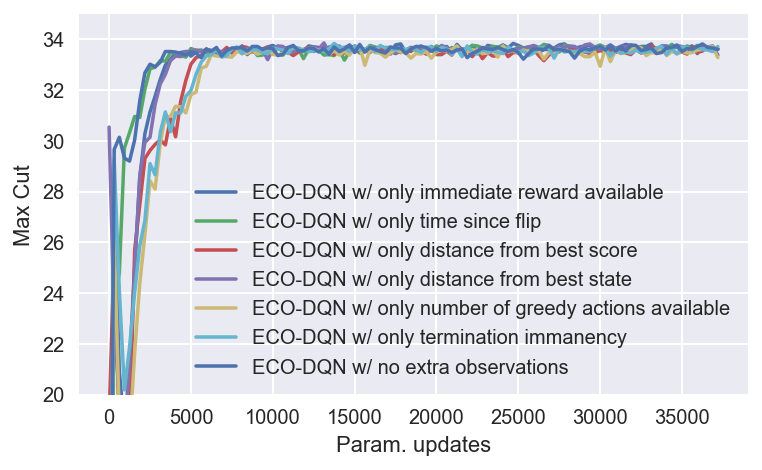

In [23]:
ax = exp_6_1_training.plot(figsize=(6, 3.5), ylim=(20,35), ylabel='Max Cut')
ax.figure.savefig('obs-search-1.png')

In [11]:
exp_6_2_locs = {
    i: f"ER_40spin_p{str(i).zfill(2)}/eco" 
    for i, s in enumerate(PERTUBED_OBSERVABLES_SETS)
    if len(s) == 3
}
exp_6_2_locs

{8: 'ER_40spin_p08/eco',
 9: 'ER_40spin_p09/eco',
 10: 'ER_40spin_p10/eco',
 11: 'ER_40spin_p11/eco',
 12: 'ER_40spin_p12/eco',
 13: 'ER_40spin_p13/eco',
 14: 'ER_40spin_p14/eco',
 15: 'ER_40spin_p15/eco',
 16: 'ER_40spin_p16/eco',
 17: 'ER_40spin_p17/eco',
 18: 'ER_40spin_p18/eco',
 19: 'ER_40spin_p19/eco',
 20: 'ER_40spin_p20/eco',
 21: 'ER_40spin_p21/eco',
 22: 'ER_40spin_p22/eco'}

In [12]:
exp_6_2_training = pd.DataFrame()
exp_6_2_training.index.name = 'Param. updates'
for i, save_loc in exp_6_2_locs.items():
    test_save_path = os.path.join(save_loc, 'network/test_scores.pkl')
    data = pickle.load(open(test_save_path,'rb'))
    data = np.array(data)
    print(data.shape)
    exp_6_2_training[
        includes_dict(PERTUBED_OBSERVABLES_SETS[i], PERTUBED_OBSERVABLES_SETS[0])
    ] = data[:, 1]
exp_6_2_training['S2V-DQN'] = \
    np.array(pickle.load(open('ER_40spin_p29/eco/network/test_scores.pkl','rb')))[:, 1]
exp_6_2_training.index = exp_6_2_training.index*312.5

(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 2)


In [13]:
exp_6_2_training['S2V-DQN']

Param. updates
0.0         4.36
312.5      29.66
625.0      30.14
937.5      29.32
1250.0     29.20
           ...  
35937.5    33.72
36250.0    33.82
36562.5    33.68
36875.0    33.66
37187.5    33.60
Name: S2V-DQN, Length: 120, dtype: float64

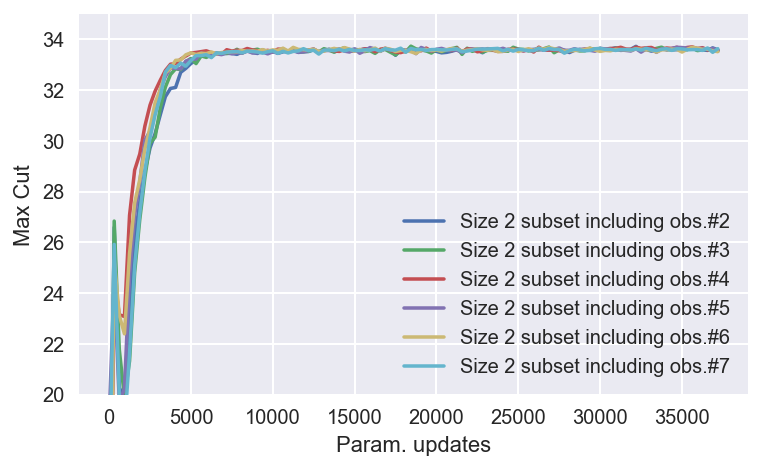

In [14]:
fig, ax = plt.subplots(figsize=(6, 3.5))
themed_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(1, 7):
    dat = exp_6_2_training.loc[:, [col[i] == '1' for col in exp_6_2_training.columns]]
    plt.plot(dat.mean(axis=1), c=themed_colors[i-1], label=f'Size 2 subset including obs.#{i+1}')

plt.ylim((20,35))
plt.xlabel('Param. updates')
ax.set_ylabel('Max Cut')
plt.legend()
plt.show()

In [15]:
fig.savefig('obs-search-2.png')

<AxesSubplot:xlabel='Param. updates'>

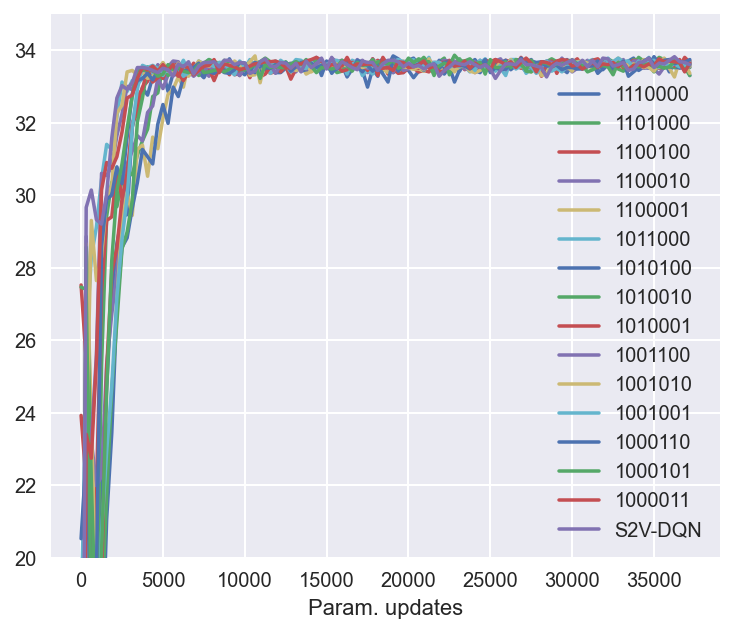

In [16]:
exp_6_2_training.plot(figsize=(6, 5), ylim=(20,35))

In [17]:
exp_6_1_locs

['ER_40spin_p23/eco',
 'ER_40spin_p24/eco',
 'ER_40spin_p25/eco',
 'ER_40spin_p26/eco',
 'ER_40spin_p27/eco',
 'ER_40spin_p28/eco']

In [18]:
exp_comparison = pd.DataFrame()
exp_comparison.index.name = 'Param. updates'

exp_comparison['ECO-DQN w/ only vertex state'] = \
    np.array(pickle.load(open('ER_40spin_p29/eco/network/test_scores.pkl','rb')))[:, 1]
exp_comparison['ECO-DQN w/ full observations'] = \
    np.array(pickle.load(open('ER_40spin_p00/eco/network/test_scores.pkl','rb')))[:, 1]
exp_comparison.index = exp_comparison.index*312.5

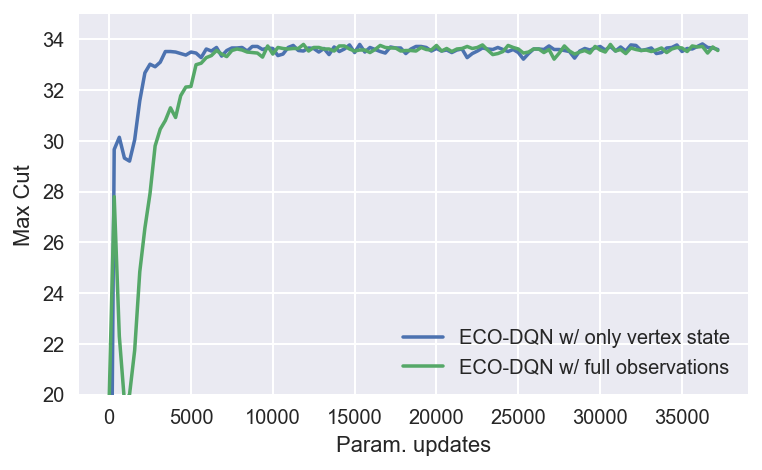

In [19]:
ax = exp_comparison.plot(figsize=(6, 3.5), ylim=(20,35), ylabel='Max Cut')

In [20]:
ax.figure.savefig('obs-comparison.png')